In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Subway = pd.read_csv('FinalTransportData.csv')

In [3]:
Data311 = pd.read_csv('Final311Data.csv')

In [4]:
FinalSales = pd.read_csv('FinalSales.csv')

In [5]:
FinalSalesChange = pd.read_csv('FinalSalesChange.csv')

In [6]:
Subway

,Unnamed: 0,ZipCode,2017.0,2018.0,2019.0,2020.0,2021.0,2017.0->2018.0,2018.0->2019.0,2019.0->2020.0,...,2020.0->2021.0PERCENT_norm,2019.0_norm,2021.0_norm,2020.0->2021.0_norm,2017.0->2018.0_norm,2019.0->2020.0PERCENT_norm,2020.0_norm,2018.0->2019.0_norm,2018.0_norm,2017.0->2018.0PERCENT_norm
0,0,10000,9360484.0,9060206.0,9065146.0,2.710023e+06,3147136.0,-300278.0,4940.0,-6.355123e+06,...,0.348110,0.058290,0.046156,0.051317,0.666808,0.080897,0.045881,0.529199,0.058723,0.461661
1,1,10002,89448670.0,86450287.0,89263954.0,3.115961e+07,35866341.0,-2998383.0,2813667.0,-5.810435e+07,...,0.320191,0.605361,0.564668,0.602962,0.115875,0.283533,0.559521,1.000000,0.591943,0.457185
2,2,10003,115776581.0,116402794.0,115836978.0,3.542308e+07,40628608.0,626213.0,-565816.0,-8.041389e+07,...,0.309016,0.786627,0.640137,0.667406,0.855991,0.108596,0.636495,0.433528,0.798316,0.578074
3,3,10004,12350364.0,12325132.0,12535263.0,3.799370e+06,4386430.0,-25232.0,210131.0,-8.735893e+06,...,0.329629,0.081961,0.065796,0.070691,0.722970,0.097654,0.065549,0.563593,0.081218,0.554933
4,4,10005,36613280.0,36139225.0,36880919.0,1.114646e+07,12960476.0,-474055.0,741694.0,-2.573446e+07,...,0.352058,0.248034,0.201671,0.229216,0.631324,0.094152,0.198196,0.652694,0.245298,0.521071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,11435,20400212.0,19267192.0,18709903.0,7.937720e+06,9274061.0,-1133020.0,-557289.0,-1.077218e+07,...,0.367350,0.124081,0.143252,0.167499,0.496768,0.587468,0.140264,0.434957,0.129049,0.388810
80,80,11691,4776610.0,4341397.0,4316109.0,2.136646e+06,2208410.0,-435213.0,-25288.0,-2.179463e+06,...,0.000000,0.025895,0.031280,0.004113,0.639255,0.873647,0.035529,0.524132,0.026210,0.278343
81,81,11692,3304605.0,2965310.0,2968344.0,1.427252e+06,1492734.0,-339295.0,3034.0,-1.541092e+06,...,0.033507,0.016701,0.019939,0.003302,0.658841,0.816177,0.022722,0.528879,0.016729,0.242445
82,82,11693,5449133.0,5015174.0,5230925.0,2.161569e+06,2279029.0,-433959.0,215751.0,-3.069356e+06,...,0.056569,0.032135,0.032399,0.010017,0.639511,0.542903,0.035979,0.564535,0.030852,0.313977


In [7]:
Subway = Subway.drop('Unnamed: 0',axis=1)

In [8]:
Subway #Cleaned for use.

,ZipCode,2017.0,2018.0,2019.0,2020.0,2021.0,2017.0->2018.0,2018.0->2019.0,2019.0->2020.0,2020.0->2021.0,...,2020.0->2021.0PERCENT_norm,2019.0_norm,2021.0_norm,2020.0->2021.0_norm,2017.0->2018.0_norm,2019.0->2020.0PERCENT_norm,2020.0_norm,2018.0->2019.0_norm,2018.0_norm,2017.0->2018.0PERCENT_norm
0,10000,9360484.0,9060206.0,9065146.0,2.710023e+06,3147136.0,-300278.0,4940.0,-6.355123e+06,437113.043,...,0.348110,0.058290,0.046156,0.051317,0.666808,0.080897,0.045881,0.529199,0.058723,0.461661
1,10002,89448670.0,86450287.0,89263954.0,3.115961e+07,35866341.0,-2998383.0,2813667.0,-5.810435e+07,4706735.219,...,0.320191,0.605361,0.564668,0.602962,0.115875,0.283533,0.559521,1.000000,0.591943,0.457185
2,10003,115776581.0,116402794.0,115836978.0,3.542308e+07,40628608.0,626213.0,-565816.0,-8.041389e+07,5205523.093,...,0.309016,0.786627,0.640137,0.667406,0.855991,0.108596,0.636495,0.433528,0.798316,0.578074
3,10004,12350364.0,12325132.0,12535263.0,3.799370e+06,4386430.0,-25232.0,210131.0,-8.735893e+06,587060.028,...,0.329629,0.081961,0.065796,0.070691,0.722970,0.097654,0.065549,0.563593,0.081218,0.554933
4,10005,36613280.0,36139225.0,36880919.0,1.114646e+07,12960476.0,-474055.0,741694.0,-2.573446e+07,1814012.247,...,0.352058,0.248034,0.201671,0.229216,0.631324,0.094152,0.198196,0.652694,0.245298,0.521071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,11435,20400212.0,19267192.0,18709903.0,7.937720e+06,9274061.0,-1133020.0,-557289.0,-1.077218e+07,1336340.975,...,0.367350,0.124081,0.143252,0.167499,0.496768,0.587468,0.140264,0.434957,0.129049,0.388810
80,11691,4776610.0,4341397.0,4316109.0,2.136646e+06,2208410.0,-435213.0,-25288.0,-2.179463e+06,71764.152,...,0.000000,0.025895,0.031280,0.004113,0.639255,0.873647,0.035529,0.524132,0.026210,0.278343
81,11692,3304605.0,2965310.0,2968344.0,1.427252e+06,1492734.0,-339295.0,3034.0,-1.541092e+06,65482.102,...,0.033507,0.016701,0.019939,0.003302,0.658841,0.816177,0.022722,0.528879,0.016729,0.242445
82,11693,5449133.0,5015174.0,5230925.0,2.161569e+06,2279029.0,-433959.0,215751.0,-3.069356e+06,117460.170,...,0.056569,0.032135,0.032399,0.010017,0.639511,0.542903,0.035979,0.564535,0.030852,0.313977


In [9]:
Data311

,Unnamed: 0,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,Zip,Complaints,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,81,http://www.usps.com/,0.0,0.0,POLYGON ((1038098.2518714815 188138.3800067156...,11436.0,40.0,NaN,NaN,NaN,NaN
1,1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,POLYGON ((1001613.7129640579 186926.4395172149...,11213.0,93.0,-90.0,5.0,157.0,-128.0
2,2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",11212.0,83.0,-80.0,2.0,150.0,-125.0
3,3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,POLYGON ((995908.3654508889 183617.61280155182...,11225.0,83.0,-79.0,0.0,110.0,-112.0
4,4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",11218.0,103.0,-101.0,0.0,131.0,-119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,85,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.5065858066 172848.9686564654,...",10310.0,68.0,-66.0,3.0,66.0,-35.0
259,259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,POLYGON ((1028453.9949133098 167153.4098376333...,NaN,NaN,NaN,NaN,NaN,NaN
260,260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,47,http://www.usps.com/,0.0,0.0,POLYGON ((995877.3182688951 203206.07493688166...,11249.0,65.0,-64.0,10.0,276.0,-271.0
261,261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,61,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.7607542276 219560.9221483767,...",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Data311 = Data311.drop('Unnamed: 0',axis =1)

In [11]:
Data311.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'Zip', 'Complaints', '17_18_Change', '18_19_Change',
       '19_20_Change', '20_21_Change'],
      dtype='object')

In [12]:
Data311 = Data311[['ZIPCODE','17_18_Change', '18_19_Change',
       '19_20_Change', '20_21_Change']]

In [13]:
Data311 #Cleaned for use.

,ZIPCODE,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,11436,NaN,NaN,NaN,NaN
1,11213,-90.0,5.0,157.0,-128.0
2,11212,-80.0,2.0,150.0,-125.0
3,11225,-79.0,0.0,110.0,-112.0
4,11218,-101.0,0.0,131.0,-119.0
...,...,...,...,...,...
258,10310,-66.0,3.0,66.0,-35.0
259,11693,NaN,NaN,NaN,NaN
260,11249,-64.0,10.0,276.0,-271.0
261,10162,NaN,NaN,NaN,NaN


In [14]:
FinalSales=FinalSales.drop('Unnamed: 0',axis =1)

In [15]:
FinalSales #Cleaned for use.

,ZIP CODE,BOROUGH,SALE COUNT 17,SALE COUNT 18,SALE COUNT 19,SALE COUNT 20,SALE COUNT 21
0,10001.0,1,3.0,2.0,3.0,NaN,4.0
1,10002.0,1,15.0,14.0,13.0,5.0,9.0
2,10003.0,1,16.0,23.0,28.0,14.0,49.0
3,10007.0,1,1.0,NaN,NaN,NaN,NaN
4,10009.0,1,10.0,35.0,29.0,35.0,22.0
...,...,...,...,...,...,...,...
166,11434.0,4,560.0,606.0,540.0,400.0,464.0
167,11435.0,4,208.0,251.0,213.0,143.0,197.0
168,11436.0,4,259.0,285.0,250.0,197.0,195.0
169,10069.0,1,NaN,1.0,NaN,NaN,NaN


In [16]:
FinalSalesChange=FinalSalesChange.drop('Unnamed: 0',axis=1)

In [17]:
FinalSalesChange #Cleaned for use.

,ZIP CODE,BOROUGH,PPSQ17,PPSQ18,PPSQ19,PPSQ20,PPSQ21,Avg_171819,Change_17-18,Change_18-19,Change_19-20,Change_20-21
0,10001.0,1,1577.364024,1469.933185,824.918981,NaN,199.639961,1290.738730,107.430840,645.014204,NaN,NaN
1,10002.0,1,705.180297,908.825421,596.943499,643.478397,606.879038,736.983072,-203.645124,311.881921,-46.534897,36.599359
2,10003.0,1,324.676358,795.771768,595.359217,1017.447261,1125.684935,571.935781,-471.095409,200.412550,-422.088043,-108.237674
3,10007.0,1,686.813187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009.0,1,963.901341,561.595200,318.059336,9.519819,723.535157,614.518626,402.306142,243.535863,308.539517,-714.015338
...,...,...,...,...,...,...,...,...,...,...,...,...
166,11434.0,4,288.047531,322.649445,334.207152,355.340451,396.413435,314.968043,-34.601914,-11.557707,-21.133299,-41.072983
167,11435.0,4,322.492707,335.767953,341.146127,122.993747,417.066139,333.135596,-13.275246,-5.378174,218.152381,-294.072393
168,11436.0,4,303.482832,345.708890,350.687551,393.295139,443.357256,333.293091,-42.226058,-4.978661,-42.607588,-50.062116
169,10069.0,1,NaN,659.216355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
Subway.columns

Index(['ZipCode', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0',
       '2017.0->2018.0', '2018.0->2019.0', '2019.0->2020.0', '2020.0->2021.0',
       '2017.0->2018.0PERCENT', '2018.0->2019.0PERCENT',
       '2019.0->2020.0PERCENT', '2020.0->2021.0PERCENT',
       '2018.0->2019.0PERCENT_norm', '2017.0_norm', '2019.0->2020.0_norm',
       '2020.0->2021.0PERCENT_norm', '2019.0_norm', '2021.0_norm',
       '2020.0->2021.0_norm', '2017.0->2018.0_norm',
       '2019.0->2020.0PERCENT_norm', '2020.0_norm', '2018.0->2019.0_norm',
       '2018.0_norm', '2017.0->2018.0PERCENT_norm'],
      dtype='object')

In [19]:
Subway2 = Subway[['ZipCode','2017.0->2018.0PERCENT', '2018.0->2019.0PERCENT',
       '2019.0->2020.0PERCENT', '2020.0->2021.0PERCENT']]

In [20]:
Subway2#Versioned for use.

,ZipCode,2017.0->2018.0PERCENT,2018.0->2019.0PERCENT,2019.0->2020.0PERCENT,2020.0->2021.0PERCENT
0,10000,-3.207932,0.054524,-70.105027,16.129496
1,10002,-3.352071,3.254665,-65.092734,15.105246
2,10003,0.540881,-0.486085,-69.419882,14.695284
3,10004,-0.204302,1.704899,-69.690544,15.451510
4,10005,-1.294762,2.052324,-69.777153,16.274330
...,...,...,...,...,...
79,11435,-5.553962,-2.892425,-57.574767,16.835325
80,11691,-9.111336,-0.582485,-50.496017,3.358729
81,11692,-10.267339,0.102316,-51.917571,4.587985
82,11693,-7.963817,4.301964,-58.677121,5.434024


In [21]:
Data311.columns

Index(['ZIPCODE', '17_18_Change', '18_19_Change', '19_20_Change',
       '20_21_Change'],
      dtype='object')

In [22]:
Data311

,ZIPCODE,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,11436,NaN,NaN,NaN,NaN
1,11213,-90.0,5.0,157.0,-128.0
2,11212,-80.0,2.0,150.0,-125.0
3,11225,-79.0,0.0,110.0,-112.0
4,11218,-101.0,0.0,131.0,-119.0
...,...,...,...,...,...
258,10310,-66.0,3.0,66.0,-35.0
259,11693,NaN,NaN,NaN,NaN
260,11249,-64.0,10.0,276.0,-271.0
261,10162,NaN,NaN,NaN,NaN


In [23]:
DATANOS = pd.read_csv('311NOS.csv')

In [24]:
DATANOS

,Unnamed: 0,Zip,Complaints,17,18,19,20,21
0,0,10001.0,9,68,3.0,5.0,4,9
1,1,10002.0,20,135,9.0,7.0,146,20
2,2,10003.0,21,127,2.0,10.0,172,21
3,3,10007.0,2,15,1.0,1.0,122,2
4,4,10009.0,16,14,1.0,7.0,19,16
...,...,...,...,...,...,...,...,...
167,167,11432.0,16,61,NaN,NaN,93,16
168,168,11433.0,13,79,NaN,NaN,310,13
169,169,11434.0,29,81,NaN,NaN,36,29
170,170,11435.0,18,98,NaN,NaN,62,18


In [25]:
DATANOS=DATANOS[['Zip','17','18','19','20','21']]

In [26]:
X311 = DATANOS.merge(Data311, left_on='Zip',right_on='ZIPCODE')

In [27]:
X311

,Zip,17,18,19,20,21,ZIPCODE,17_18_Change,18_19_Change,19_20_Change,20_21_Change
0,10001.0,68,3.0,5.0,4,9,10001,-65.0,2.0,-1.0,5.0
1,10002.0,135,9.0,7.0,146,20,10002,-126.0,-2.0,139.0,-126.0
2,10003.0,127,2.0,10.0,172,21,10003,-125.0,8.0,162.0,-151.0
3,10007.0,15,1.0,1.0,122,2,10007,-24.0,3.0,3.0,18.0
4,10009.0,14,1.0,7.0,19,16,10009,-69.0,4.0,43.0,-36.0
...,...,...,...,...,...,...,...,...,...,...,...
173,11432.0,61,NaN,NaN,93,16,11432,NaN,NaN,NaN,NaN
174,11433.0,79,NaN,NaN,310,13,11433,NaN,NaN,NaN,NaN
175,11434.0,81,NaN,NaN,36,29,11434,NaN,NaN,NaN,NaN
176,11435.0,98,NaN,NaN,62,18,11435,NaN,NaN,NaN,NaN


In [28]:
Nos = ['17','18','19','20','21']

In [29]:
Nos[1]

'18'

In [30]:
for x in range(0,4):
    X311['{0}->{1} PERC Change'.format(Nos[x],Nos[x+1])]=(100*(X311['{0}'.format(Nos[x+1])]-X311['{0}'.format(Nos[x])]))/X311['{0}'.format(Nos[x])]

In [31]:
X311.columns

Index(['Zip', '17', '18', '19', '20', '21', 'ZIPCODE', '17_18_Change',
       '18_19_Change', '19_20_Change', '20_21_Change', '17->18 PERC Change',
       '18->19 PERC Change', '19->20 PERC Change', '20->21 PERC Change'],
      dtype='object')

In [32]:
X311=X311[['Zip','17->18 PERC Change','18->19 PERC Change', '19->20 PERC Change', '20->21 PERC Change']]

In [33]:
X311

,Zip,17->18 PERC Change,18->19 PERC Change,19->20 PERC Change,20->21 PERC Change
0,10001.0,-95.588235,66.666667,-20.000000,125.000000
1,10002.0,-93.333333,-22.222222,1985.714286,-86.301370
2,10003.0,-98.425197,400.000000,1620.000000,-87.790698
3,10007.0,-93.333333,0.000000,12100.000000,-98.360656
4,10009.0,-92.857143,600.000000,171.428571,-15.789474
...,...,...,...,...,...
173,11432.0,NaN,NaN,NaN,-82.795699
174,11433.0,NaN,NaN,NaN,-95.806452
175,11434.0,NaN,NaN,NaN,-19.444444
176,11435.0,NaN,NaN,NaN,-70.967742


In [34]:
Subway2

,ZipCode,2017.0->2018.0PERCENT,2018.0->2019.0PERCENT,2019.0->2020.0PERCENT,2020.0->2021.0PERCENT
0,10000,-3.207932,0.054524,-70.105027,16.129496
1,10002,-3.352071,3.254665,-65.092734,15.105246
2,10003,0.540881,-0.486085,-69.419882,14.695284
3,10004,-0.204302,1.704899,-69.690544,15.451510
4,10005,-1.294762,2.052324,-69.777153,16.274330
...,...,...,...,...,...
79,11435,-5.553962,-2.892425,-57.574767,16.835325
80,11691,-9.111336,-0.582485,-50.496017,3.358729
81,11692,-10.267339,0.102316,-51.917571,4.587985
82,11693,-7.963817,4.301964,-58.677121,5.434024


In [35]:
Data3112=X311

In [36]:
FinalSalesChange.columns

Index(['ZIP CODE', 'BOROUGH', 'PPSQ17', 'PPSQ18', 'PPSQ19', 'PPSQ20', 'PPSQ21',
       'Avg_171819', 'Change_17-18', 'Change_18-19', 'Change_19-20',
       'Change_20-21'],
      dtype='object')

In [37]:
FinalSales

,ZIP CODE,BOROUGH,SALE COUNT 17,SALE COUNT 18,SALE COUNT 19,SALE COUNT 20,SALE COUNT 21
0,10001.0,1,3.0,2.0,3.0,NaN,4.0
1,10002.0,1,15.0,14.0,13.0,5.0,9.0
2,10003.0,1,16.0,23.0,28.0,14.0,49.0
3,10007.0,1,1.0,NaN,NaN,NaN,NaN
4,10009.0,1,10.0,35.0,29.0,35.0,22.0
...,...,...,...,...,...,...,...
166,11434.0,4,560.0,606.0,540.0,400.0,464.0
167,11435.0,4,208.0,251.0,213.0,143.0,197.0
168,11436.0,4,259.0,285.0,250.0,197.0,195.0
169,10069.0,1,NaN,1.0,NaN,NaN,NaN


In [38]:
Sales2=FinalSales

In [39]:
Nos = ['17','18','19','20','21']

In [40]:
for x in range(0,4):
    Sales2['{0}->{1} PERC Change Housing'.format(Nos[x],Nos[x+1])]=(100*(Sales2['SALE COUNT {0}'.format(Nos[x+1])]-Sales2['SALE COUNT {0}'.format(Nos[x])]))/Sales2['SALE COUNT {0}'.format(Nos[x])]
    
    
    
    
    
    

In [41]:
Sales2.columns

Index(['ZIP CODE', 'BOROUGH', 'SALE COUNT 17', 'SALE COUNT 18',
       'SALE COUNT 19', 'SALE COUNT 20', 'SALE COUNT 21',
       '17->18 PERC Change Housing', '18->19 PERC Change Housing',
       '19->20 PERC Change Housing', '20->21 PERC Change Housing'],
      dtype='object')

In [42]:
Sales2=Sales2[['ZIP CODE','17->18 PERC Change Housing','18->19 PERC Change Housing', '19->20 PERC Change Housing', '20->21 PERC Change Housing']]

In [43]:
Sales2

,ZIP CODE,17->18 PERC Change Housing,18->19 PERC Change Housing,19->20 PERC Change Housing,20->21 PERC Change Housing
0,10001.0,-33.333333,50.000000,NaN,NaN
1,10002.0,-6.666667,-7.142857,-61.538462,80.000000
2,10003.0,43.750000,21.739130,-50.000000,250.000000
3,10007.0,NaN,NaN,NaN,NaN
4,10009.0,250.000000,-17.142857,20.689655,-37.142857
...,...,...,...,...,...
166,11434.0,8.214286,-10.891089,-25.925926,16.000000
167,11435.0,20.673077,-15.139442,-32.863850,37.762238
168,11436.0,10.038610,-12.280702,-21.200000,-1.015228
169,10069.0,NaN,NaN,NaN,NaN


In [44]:
Subway2

,ZipCode,2017.0->2018.0PERCENT,2018.0->2019.0PERCENT,2019.0->2020.0PERCENT,2020.0->2021.0PERCENT
0,10000,-3.207932,0.054524,-70.105027,16.129496
1,10002,-3.352071,3.254665,-65.092734,15.105246
2,10003,0.540881,-0.486085,-69.419882,14.695284
3,10004,-0.204302,1.704899,-69.690544,15.451510
4,10005,-1.294762,2.052324,-69.777153,16.274330
...,...,...,...,...,...
79,11435,-5.553962,-2.892425,-57.574767,16.835325
80,11691,-9.111336,-0.582485,-50.496017,3.358729
81,11692,-10.267339,0.102316,-51.917571,4.587985
82,11693,-7.963817,4.301964,-58.677121,5.434024


In [45]:
Data3112

,Zip,17->18 PERC Change,18->19 PERC Change,19->20 PERC Change,20->21 PERC Change
0,10001.0,-95.588235,66.666667,-20.000000,125.000000
1,10002.0,-93.333333,-22.222222,1985.714286,-86.301370
2,10003.0,-98.425197,400.000000,1620.000000,-87.790698
3,10007.0,-93.333333,0.000000,12100.000000,-98.360656
4,10009.0,-92.857143,600.000000,171.428571,-15.789474
...,...,...,...,...,...
173,11432.0,NaN,NaN,NaN,-82.795699
174,11433.0,NaN,NaN,NaN,-95.806452
175,11434.0,NaN,NaN,NaN,-19.444444
176,11435.0,NaN,NaN,NaN,-70.967742


In [46]:
Data3112 = Data3112.rename(columns={"Zip": "Zip", "17->18 PERC Change": "1718D311", "18->19 PERC Change": "1819D311", "19->20 PERC Change": "1920D311", "20->21 PERC Change": "2021D311"})

In [47]:
Data3112 #Leggo

,Zip,1718D311,1819D311,1920D311,2021D311
0,10001.0,-95.588235,66.666667,-20.000000,125.000000
1,10002.0,-93.333333,-22.222222,1985.714286,-86.301370
2,10003.0,-98.425197,400.000000,1620.000000,-87.790698
3,10007.0,-93.333333,0.000000,12100.000000,-98.360656
4,10009.0,-92.857143,600.000000,171.428571,-15.789474
...,...,...,...,...,...
173,11432.0,NaN,NaN,NaN,-82.795699
174,11433.0,NaN,NaN,NaN,-95.806452
175,11434.0,NaN,NaN,NaN,-19.444444
176,11435.0,NaN,NaN,NaN,-70.967742


In [48]:
Sales2 = Sales2.rename(columns={"ZIP CODE": "Zip", "17->18 PERC Change Housing": "1718Sales", "18->19 PERC Change Housing": "1819Sales", "19->20 PERC Change Housing": "1920Sales", "20->21 PERC Change Housing": "2021Sales"})

In [49]:
Sales2 #Leggo

,Zip,1718Sales,1819Sales,1920Sales,2021Sales
0,10001.0,-33.333333,50.000000,NaN,NaN
1,10002.0,-6.666667,-7.142857,-61.538462,80.000000
2,10003.0,43.750000,21.739130,-50.000000,250.000000
3,10007.0,NaN,NaN,NaN,NaN
4,10009.0,250.000000,-17.142857,20.689655,-37.142857
...,...,...,...,...,...
166,11434.0,8.214286,-10.891089,-25.925926,16.000000
167,11435.0,20.673077,-15.139442,-32.863850,37.762238
168,11436.0,10.038610,-12.280702,-21.200000,-1.015228
169,10069.0,NaN,NaN,NaN,NaN


In [50]:
Subway2.columns

Index(['ZipCode', '2017.0->2018.0PERCENT', '2018.0->2019.0PERCENT',
       '2019.0->2020.0PERCENT', '2020.0->2021.0PERCENT'],
      dtype='object')

In [51]:
Subway2 = Subway2.rename(columns={"ZipCode": "Zip", '2017.0->2018.0PERCENT': "1718Sub", "2018.0->2019.0PERCENT": "1819Sub", "2019.0->2020.0PERCENT": "1920Sub", "2020.0->2021.0PERCENT": "2021Sub"})

In [52]:
Subway2 #Leggo

,Zip,1718Sub,1819Sub,1920Sub,2021Sub
0,10000,-3.207932,0.054524,-70.105027,16.129496
1,10002,-3.352071,3.254665,-65.092734,15.105246
2,10003,0.540881,-0.486085,-69.419882,14.695284
3,10004,-0.204302,1.704899,-69.690544,15.451510
4,10005,-1.294762,2.052324,-69.777153,16.274330
...,...,...,...,...,...
79,11435,-5.553962,-2.892425,-57.574767,16.835325
80,11691,-9.111336,-0.582485,-50.496017,3.358729
81,11692,-10.267339,0.102316,-51.917571,4.587985
82,11693,-7.963817,4.301964,-58.677121,5.434024


In [53]:
A1 = Sales2

In [54]:
A1 = A1.merge(Subway2,left_on='Zip',right_on='Zip',how='left')

In [55]:
A1

,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub
0,10001.0,-33.333333,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,10002.0,-6.666667,-7.142857,-61.538462,80.000000,-3.352071,3.254665,-65.092734,15.105246
2,10003.0,43.750000,21.739130,-50.000000,250.000000,0.540881,-0.486085,-69.419882,14.695284
3,10007.0,NaN,NaN,NaN,NaN,1.307980,-3.541898,-71.181135,8.535341
4,10009.0,250.000000,-17.142857,20.689655,-37.142857,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
166,11434.0,8.214286,-10.891089,-25.925926,16.000000,NaN,NaN,NaN,NaN
167,11435.0,20.673077,-15.139442,-32.863850,37.762238,-5.553962,-2.892425,-57.574767,16.835325
168,11436.0,10.038610,-12.280702,-21.200000,-1.015228,NaN,NaN,NaN,NaN
169,10069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
A1 = A1.merge(Data3112,left_on='Zip',right_on='Zip',how='left')

In [57]:
Waste = pd.read_excel('WasteMax.xlsx')

In [58]:
Waste = Waste.rename(columns={'ZIP CODE':'Zip','2017':'17','2018':'18','2019':'19','2020':'20','2021':'21'})

In [59]:
Nos

['17', '18', '19', '20', '21']

In [60]:
for x in range(0,4):
    Waste['{0}{1}Waste'.format(Nos[x],Nos[x+1])]=(100*(Waste['{0}'.format(Nos[x+1])]-Waste['{0}'.format(Nos[x])]))/Waste['{0}'.format(Nos[x])]

In [61]:
Waste = Waste[['Zip','1718Waste', '1819Waste','1920Waste', '2021Waste']]

In [62]:
A1 = A1.merge(Waste,left_on='Zip',right_on='Zip',how='left')

In [63]:
A1

,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub,1718D311,1819D311,1920D311,2021D311,1718Waste,1819Waste,1920Waste,2021Waste
0,10001.0,-33.333333,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,-95.588235,66.666667,-20.000000,125.000000,16.797900,10.337079,2.443992,29.423459
1,10002.0,-6.666667,-7.142857,-61.538462,80.000000,-3.352071,3.254665,-65.092734,15.105246,-93.333333,-22.222222,1985.714286,-86.301370,24.825986,-2.602230,3.053435,20.740741
2,10003.0,43.750000,21.739130,-50.000000,250.000000,0.540881,-0.486085,-69.419882,14.695284,-98.425197,400.000000,1620.000000,-87.790698,28.095238,-15.985130,15.044248,28.846154
3,10007.0,NaN,NaN,NaN,NaN,1.307980,-3.541898,-71.181135,8.535341,-93.333333,0.000000,12100.000000,-98.360656,13.043478,-0.961538,49.514563,0.649351
4,10009.0,250.000000,-17.142857,20.689655,-37.142857,NaN,NaN,NaN,NaN,-92.857143,600.000000,171.428571,-15.789474,8.474576,1.562500,-5.641026,35.597826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,11434.0,8.214286,-10.891089,-25.925926,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.444444,19.724771,2.298851,39.700375,15.817694
174,11435.0,20.673077,-15.139442,-32.863850,37.762238,-5.553962,-2.892425,-57.574767,16.835325,NaN,NaN,NaN,-70.967742,9.621993,9.717868,18.285714,26.811594
175,11436.0,10.038610,-12.280702,-21.200000,-1.015228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.263158,8.181818,35.294118,13.043478,13.736264
176,10069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,44.444444,15.384615,-6.666667


In [64]:
#A1 = A1.set_index('Zip')

In [65]:
A1

,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub,1718D311,1819D311,1920D311,2021D311,1718Waste,1819Waste,1920Waste,2021Waste
0,10001.0,-33.333333,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,-95.588235,66.666667,-20.000000,125.000000,16.797900,10.337079,2.443992,29.423459
1,10002.0,-6.666667,-7.142857,-61.538462,80.000000,-3.352071,3.254665,-65.092734,15.105246,-93.333333,-22.222222,1985.714286,-86.301370,24.825986,-2.602230,3.053435,20.740741
2,10003.0,43.750000,21.739130,-50.000000,250.000000,0.540881,-0.486085,-69.419882,14.695284,-98.425197,400.000000,1620.000000,-87.790698,28.095238,-15.985130,15.044248,28.846154
3,10007.0,NaN,NaN,NaN,NaN,1.307980,-3.541898,-71.181135,8.535341,-93.333333,0.000000,12100.000000,-98.360656,13.043478,-0.961538,49.514563,0.649351
4,10009.0,250.000000,-17.142857,20.689655,-37.142857,NaN,NaN,NaN,NaN,-92.857143,600.000000,171.428571,-15.789474,8.474576,1.562500,-5.641026,35.597826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,11434.0,8.214286,-10.891089,-25.925926,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.444444,19.724771,2.298851,39.700375,15.817694
174,11435.0,20.673077,-15.139442,-32.863850,37.762238,-5.553962,-2.892425,-57.574767,16.835325,NaN,NaN,NaN,-70.967742,9.621993,9.717868,18.285714,26.811594
175,11436.0,10.038610,-12.280702,-21.200000,-1.015228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.263158,8.181818,35.294118,13.043478,13.736264
176,10069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,44.444444,15.384615,-6.666667


In [66]:
import geopandas as gpd

In [67]:
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")

In [68]:
NYCzip = NYCzip.loc[(NYCzip['zipcode']>=10000)&(NYCzip['zipcode']<11500)]

In [69]:
R1 = NYCzip.merge(A1,left_on='zipcode',right_on='Zip')

In [70]:
R1

,zipcode,geometry,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub,1718D311,1819D311,1920D311,2021D311,1718Waste,1819Waste,1920Waste,2021Waste
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,-24.193548,2.127660,-35.416667,16.129032,NaN,NaN,NaN,NaN,-98.765432,200.000000,300.000000,-50.000000,5.369128,-9.872611,40.282686,19.395466
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,-22.471910,2.898551,-15.492958,60.000000,NaN,NaN,NaN,NaN,-96.694215,-25.000000,2833.333333,-97.727273,-20.967742,34.693878,56.060606,23.300971
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,0.000000,5.000000,-33.333333,78.571429,NaN,NaN,NaN,NaN,-96.938776,833.333333,460.714286,-99.363057,-58.823529,0.000000,157.142857,-58.333333
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,-0.609756,-31.288344,-3.571429,64.814815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.405797,-8.247423,152.808989,-17.333333,17.741935
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,-23.770492,7.526882,-15.500000,31.360947,NaN,NaN,NaN,NaN,-98.540146,50.000000,2466.666667,-80.519481,38.666667,-10.096154,68.449198,-0.634921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,10019.0,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019.0,-50.000000,-80.000000,2300.000000,-45.833333,NaN,NaN,NaN,NaN,-97.222222,200.000000,988.888889,-76.530612,1.937046,5.938242,12.331839,20.758483
189,10022.0,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022.0,62.500000,-38.461538,-25.000000,100.000000,NaN,NaN,NaN,NaN,-90.196078,60.000000,287.500000,-77.419355,14.705882,-22.792023,57.933579,16.588785
190,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065.0,-17.647059,85.714286,-46.153846,57.142857,NaN,NaN,NaN,NaN,-94.285714,50.000000,3166.666667,-90.816327,18.500000,-24.894515,5.617978,19.680851
191,10075.0,"POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...",10075.0,33.333333,-8.333333,-63.636364,250.000000,NaN,NaN,NaN,NaN,-96.875000,0.000000,6500.000000,-90.909091,20.000000,-14.492754,16.949153,23.188406


In [71]:
from sklearn.cluster import KMeans

In [72]:
from sklearn.mixture import GaussianMixture 

In [73]:
G=GaussianMixture(n_components=4,random_state=1)

In [74]:
R1=R1.fillna(0)

In [75]:
R1.columns

Index(['zipcode', 'geometry', 'Zip', '1718Sales', '1819Sales', '1920Sales',
       '2021Sales', '1718Sub', '1819Sub', '1920Sub', '2021Sub', '1718D311',
       '1819D311', '1920D311', '2021D311', '1718Waste', '1819Waste',
       '1920Waste', '2021Waste'],
      dtype='object')

In [76]:
R = G.fit(R1[{'1718Sales', '1819Sales', '1920Sales','2021Sales', '1718Sub', '1819Sub', '1920Sub', '2021Sub', '1718D311','1819D311', '1920D311', '2021D311'}])

#R = G.fit(R1[{'1718Sales', '1819Sales', '1920Sales','2021Sales', '1718Sub', '1819Sub', '1920Sub', '2021Sub'}])









In [77]:
Results = R.predict(R1[{'1718Sales', '1819Sales', '1920Sales','2021Sales', '1718Sub', '1819Sub', '1920Sub', '2021Sub', '1718D311','1819D311', '1920D311', '2021D311'}])







In [78]:
Results

array([0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 3, 0, 2, 3, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2])

In [79]:
R1['Cluster1']=Results

In [80]:
R1

,zipcode,geometry,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub,1718D311,1819D311,1920D311,2021D311,1718Waste,1819Waste,1920Waste,2021Waste,Cluster1
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,-24.193548,2.127660,-35.416667,16.129032,0.0,0.0,0.0,0.0,-98.765432,200.000000,300.000000,-50.000000,5.369128,-9.872611,40.282686,19.395466,0
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,-22.471910,2.898551,-15.492958,60.000000,0.0,0.0,0.0,0.0,-96.694215,-25.000000,2833.333333,-97.727273,-20.967742,34.693878,56.060606,23.300971,0
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,0.000000,5.000000,-33.333333,78.571429,0.0,0.0,0.0,0.0,-96.938776,833.333333,460.714286,-99.363057,-58.823529,0.000000,157.142857,-58.333333,0
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,-0.609756,-31.288344,-3.571429,64.814815,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-88.405797,-8.247423,152.808989,-17.333333,17.741935,2
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,-23.770492,7.526882,-15.500000,31.360947,0.0,0.0,0.0,0.0,-98.540146,50.000000,2466.666667,-80.519481,38.666667,-10.096154,68.449198,-0.634921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,10019.0,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019.0,-50.000000,-80.000000,2300.000000,-45.833333,0.0,0.0,0.0,0.0,-97.222222,200.000000,988.888889,-76.530612,1.937046,5.938242,12.331839,20.758483,1
189,10022.0,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022.0,62.500000,-38.461538,-25.000000,100.000000,0.0,0.0,0.0,0.0,-90.196078,60.000000,287.500000,-77.419355,14.705882,-22.792023,57.933579,16.588785,0
190,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065.0,-17.647059,85.714286,-46.153846,57.142857,0.0,0.0,0.0,0.0,-94.285714,50.000000,3166.666667,-90.816327,18.500000,-24.894515,5.617978,19.680851,0
191,10075.0,"POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...",10075.0,33.333333,-8.333333,-63.636364,250.000000,0.0,0.0,0.0,0.0,-96.875000,0.000000,6500.000000,-90.909091,20.000000,-14.492754,16.949153,23.188406,0


In [81]:
R1.to_csv('Attempt1Dataset.csv')

<AxesSubplot: >

<Figure size 2000x2000 with 0 Axes>

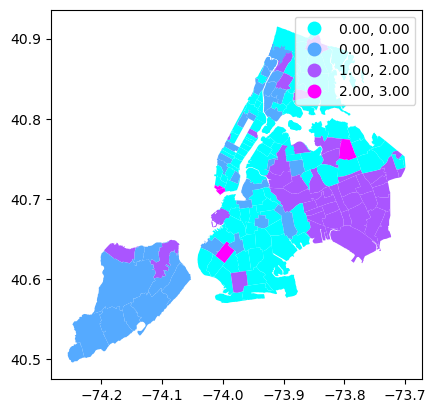

In [82]:
plt.figure(figsize=(20,20))
R1.plot(column='Cluster1', scheme='quantiles', legend = True, cmap='cool')

In [83]:
YRS = ['1718','1819','1920','2021']

<Figure size 2000x2000 with 0 Axes>

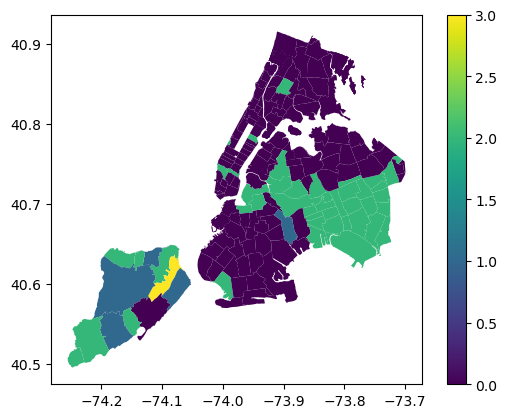

<Figure size 2000x2000 with 0 Axes>

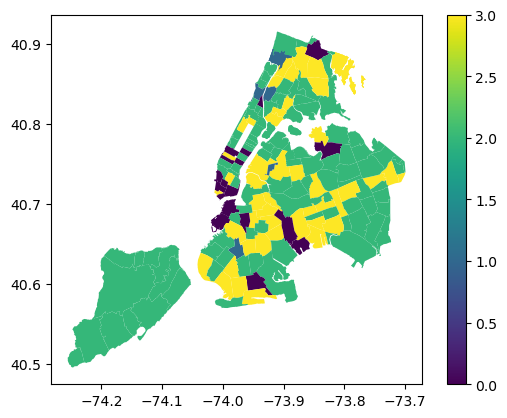

<Figure size 2000x2000 with 0 Axes>

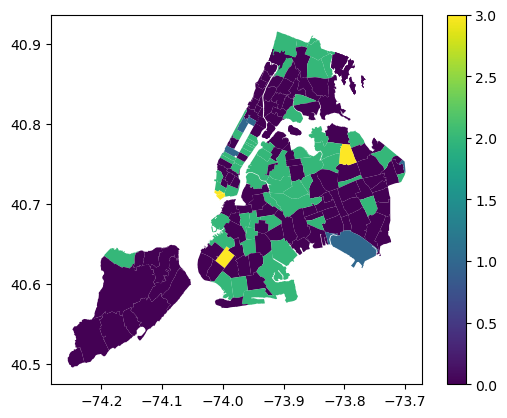

<Figure size 2000x2000 with 0 Axes>

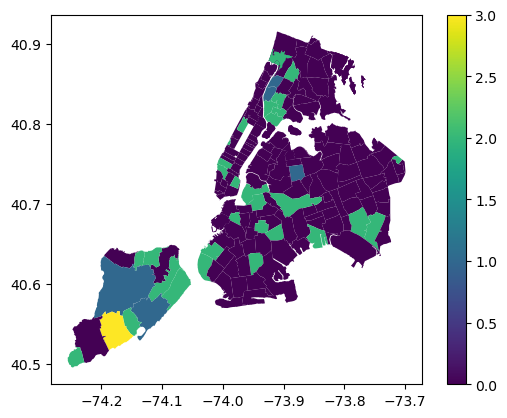

In [91]:
for x in YRS:
    G=GaussianMixture(n_components=4,random_state=1)
    R = G.fit(R1[{'{0}Sales'.format(x),'{0}Sub'.format(x),'{0}D311'.format(x),'{0}Waste'.format(x)}])
    #R = G.fit(R1[{'{0}Sales'.format(x),'{0}Waste'.format(x)}])
    Results = R.predict(R1[{'{0}Sales'.format(x),'{0}Sub'.format(x),'{0}D311'.format(x),'{0}Waste'.format(x)}])
    #Results = R.predict(R1[{'{0}Sales'.format(x),'{0}Waste'.format(x)}])
    R1['Cluster1{0}'.format(x)]=Results
    plt.figure(figsize=(20,20))
    R1.plot(column='Cluster1{0}'.format(x), legend = True,)

In [85]:
R1

,zipcode,geometry,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,...,2021D311,1718Waste,1819Waste,1920Waste,2021Waste,Cluster1,Cluster11718,Cluster11819,Cluster11920,Cluster12021
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,-24.193548,2.127660,-35.416667,16.129032,0.0,0.0,0.0,...,-50.000000,5.369128,-9.872611,40.282686,19.395466,0,1,0,0,0
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,-22.471910,2.898551,-15.492958,60.000000,0.0,0.0,0.0,...,-97.727273,-20.967742,34.693878,56.060606,23.300971,0,1,0,0,0
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,0.000000,5.000000,-33.333333,78.571429,0.0,0.0,0.0,...,-99.363057,-58.823529,0.000000,157.142857,-58.333333,0,1,1,1,0
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,-0.609756,-31.288344,-3.571429,64.814815,0.0,0.0,0.0,...,-88.405797,-8.247423,152.808989,-17.333333,17.741935,2,1,0,0,0
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,-23.770492,7.526882,-15.500000,31.360947,0.0,0.0,0.0,...,-80.519481,38.666667,-10.096154,68.449198,-0.634921,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,10019.0,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019.0,-50.000000,-80.000000,2300.000000,-45.833333,0.0,0.0,0.0,...,-76.530612,1.937046,5.938242,12.331839,20.758483,1,0,1,1,0
189,10022.0,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022.0,62.500000,-38.461538,-25.000000,100.000000,0.0,0.0,0.0,...,-77.419355,14.705882,-22.792023,57.933579,16.588785,0,0,0,0,0
190,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065.0,-17.647059,85.714286,-46.153846,57.142857,0.0,0.0,0.0,...,-90.816327,18.500000,-24.894515,5.617978,19.680851,0,1,1,0,0
191,10075.0,"POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...",10075.0,33.333333,-8.333333,-63.636364,250.000000,0.0,0.0,0.0,...,-90.909091,20.000000,-14.492754,16.949153,23.188406,0,0,0,0,0


In [86]:
R1.corr()

,zipcode,Zip,1718Sales,1819Sales,1920Sales,2021Sales,1718Sub,1819Sub,1920Sub,2021Sub,...,2021D311,1718Waste,1819Waste,1920Waste,2021Waste,Cluster1,Cluster11718,Cluster11819,Cluster11920,Cluster12021
zipcode,1.000000,1.000000,-0.080578,-0.136482,-0.108018,-0.142425,0.111787,-0.074462,-0.010334,0.121632,...,-0.151063,-0.043935,-0.041998,0.190460,0.027083,0.247534,0.152644,-0.367809,-0.088114,-0.122797
Zip,1.000000,1.000000,-0.080578,-0.136482,-0.108018,-0.142425,0.111787,-0.074462,-0.010334,0.121632,...,-0.151063,-0.043935,-0.041998,0.190460,0.027083,0.247534,0.152644,-0.367809,-0.088114,-0.122797
1718Sales,-0.080578,-0.080578,1.000000,-0.369406,-0.065466,-0.183856,0.012764,0.197622,0.006944,0.060280,...,0.055532,0.026370,-0.038930,-0.054612,0.118215,0.075810,-0.067856,-0.193522,0.024752,0.035515
1819Sales,-0.136482,-0.136482,-0.369406,1.000000,-0.130632,0.320562,0.030965,-0.138630,-0.064009,-0.033385,...,-0.100923,0.083205,0.007116,0.080171,-0.028530,-0.024109,-0.102943,0.428224,0.099970,-0.117747
1920Sales,-0.108018,-0.108018,-0.065466,-0.130632,1.000000,-0.168630,-0.007041,0.062682,0.080153,-0.060043,...,0.001164,-0.006389,-0.019787,-0.001108,-0.030270,0.016973,-0.047231,0.099839,0.451649,-0.007741
2021Sales,-0.142425,-0.142425,-0.183856,0.320562,-0.168630,1.000000,-0.095628,-0.142766,-0.170584,0.080706,...,-0.061621,0.121128,-0.069299,-0.075491,0.041254,-0.040712,-0.212916,0.227749,-0.087659,-0.112607
1718Sub,0.111787,0.111787,0.012764,0.030965,-0.007041,-0.095628,1.000000,-0.230975,0.275035,-0.159821,...,-0.047751,-0.080796,0.018694,0.090281,-0.150430,0.055774,0.293949,-0.108218,-0.189368,0.009407
1819Sub,-0.074462,-0.074462,0.197622,-0.138630,0.062682,-0.142766,-0.230975,1.000000,0.008862,0.019610,...,0.033406,-0.055653,-0.036815,-0.071410,0.033523,-0.091384,0.024983,-0.108461,0.308709,-0.009627
1920Sub,-0.010334,-0.010334,0.006944,-0.064009,0.080153,-0.170584,0.275035,0.008862,1.000000,-0.874628,...,0.058264,-0.111253,0.120489,0.066198,-0.029007,-0.010606,0.800412,-0.122467,0.060858,0.030651
2021Sub,0.121632,0.121632,0.060280,-0.033385,-0.060043,0.080706,-0.159821,0.019610,-0.874628,1.000000,...,-0.057325,0.025086,-0.115033,-0.055284,-0.018229,0.010765,-0.710092,-0.006151,0.002412,0.038327
